In [15]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score
import matplotlib.pyplot as plt

warnings.filterwarnings(action='ignore')

In [3]:
df = pd.read_csv("modified_0420.csv")

In [4]:
new_loan_status = []
for i in range(len(df)) :
    if df['loan_status'][i] == 0 :
        new_loan_status.append(1)
    else :
        new_loan_status.append(0)

df.insert(0, 'new_loan_status', new_loan_status)
df

,new_loan_status,Unnamed: 0,loan_amnt,term,int_rate,installment,sub_grade,emp_length,loan_status,delinq_2yrs,...,tax_liens_log,tot_cur_bal_log,tot_hi_cred_lim_log,total_acc_log,total_bal_ex_mort_log,total_bal_il_log,total_bc_limit_log,total_cu_tl_log,total_il_high_credit_limit_log,total_rev_hi_lim_log
0,1,0,6000.0,36,7.97,187.94,4,2,0,1.0,...,0.0,10.820878,11.272280,3.610918,10.820878,10.757158,9.615872,0.000000,10.942208,10.003378
1,0,1,23200.0,60,24.99,680.82,23,10,1,1.0,...,0.0,13.315176,13.386134,4.110874,12.592905,12.533767,9.918425,1.386294,12.582679,10.317450
2,0,2,16000.0,36,7.07,494.55,1,10,1,0.0,...,0.0,11.522113,12.186584,3.367296,10.390594,10.263641,10.987003,0.000000,10.806490,11.157692
3,1,3,4500.0,36,10.42,146.10,7,5,0,0.0,...,0.0,12.178635,12.263577,2.302585,9.166806,7.919356,9.137877,0.000000,9.390242,9.532496
4,1,4,20000.0,36,9.99,645.25,7,10,0,0.0,...,0.0,11.831590,12.137612,3.713572,11.101704,0.000000,9.305741,0.000000,11.199461,10.229224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131677,1,1131677,26500.0,60,17.27,662.45,14,2,0,0.0,...,0.0,12.346938,12.461776,2.833213,10.434557,0.000000,9.846970,0.000000,9.728241,10.507831
1131678,0,1131678,3600.0,36,19.99,133.78,20,7,1,0.0,...,0.0,11.195760,11.378571,2.302585,9.390493,0.000000,8.779711,0.000000,9.501217,9.278092
1131679,1,1131679,19000.0,36,6.68,583.89,2,4,0,0.0,...,0.0,12.388636,12.548072,3.526361,10.837304,0.000000,9.775711,0.000000,10.681688,10.225607
1131680,1,1131680,9600.0,36,14.33,329.65,10,9,0,0.0,...,0.0,11.884551,11.926941,2.197225,9.513256,0.000000,8.343078,0.000000,9.251002,8.881975


In [8]:
df_X = df.drop(columns=['loan_status', 'new_loan_status', 'Unnamed: 0'])
df_y = df['new_loan_status']

In [9]:
df_X = df_X.astype('float32')
X_train, X_validation, y_train, y_validation = train_test_split(df_X, df_y, test_size = 0.2, random_state = 42)

In [10]:
model = XGBClassifier(n_estimators=100)
xgb_model = model.fit(X_train, y_train, eval_metric='logloss')
y_pre = xgb_model.predict(X_validation)
y_pred_probs = xgb_model.predict_proba(X_validation)[:,1]

In [11]:
def get_clf_eval(y_test, pred=None, pred_proba_po=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred_proba_po)
   
    print("오차 행렬")
    print(confusion)
    print(f"정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")

In [12]:
get_clf_eval(y_validation, pred = y_pre, pred_proba_po = y_pred_probs)

오차 행렬
[[  4534  41287]
 [  3600 176916]]
정확도: 0.8017, 정밀도: 0.8108, 재현율: 0.9801, F1: 0.8874, AUC: 0.7233


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

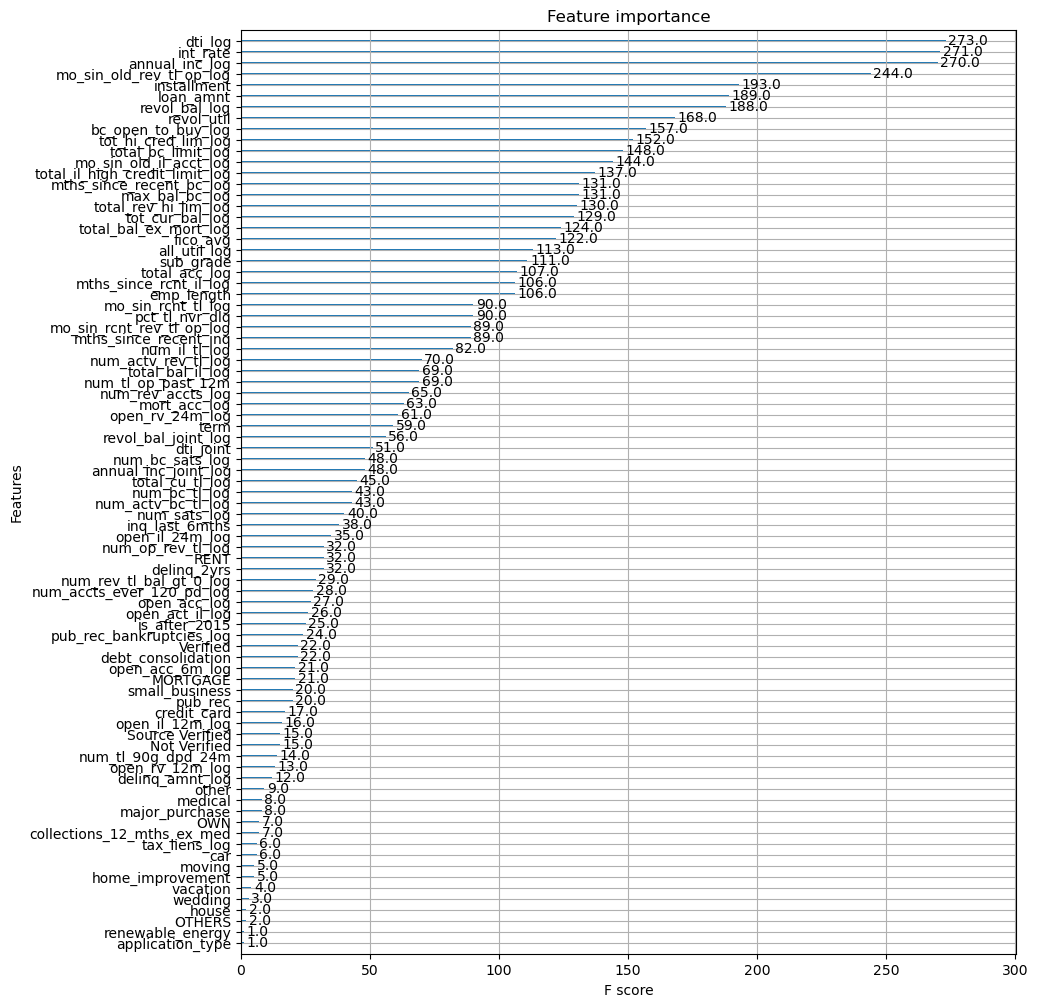

In [16]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)